# <font color='#197D75'> MD005 - Clustering </font>

## <font color='#197D75'> 1 - Introduccion </font>

Para la realizacion de este entregable, hemos escogido la base de datos de NBA: Datos de la NBA (National Basket Association) desde el 1996 hasta el 2021 con informaci´on de los jugadores (https://www.kaggle.com/datasets/justinas/nba-players-data).

Queremos determinar distintos tipos de jugadores en base a sus promedios de puntos, rebotes y asistencias por temporada. Lo que quiero lograr es poder definir, sin etiquetas, los tipos de jugadores que existieron a lo largo de mi dataset. La finalidad es brindar una herramienta de etiquetado para saber que clase de jugador se fue de mi equipo para saber que lo debo de reemplazar con una clase de jugador similar. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import seaborn as sns
from scipy.cluster import hierarchy

In [2]:
# Especifica la ruta del archivo CSV
ruta_archivo = "C:/Users/Mateo/Documents/Mateo/Data Science - La Salle/MD005 - Sistemas basados en el conocimiento/TP2 - Agrupaciones/NBA/all_seasons.csv"

# Lee el archivo CSV y almacena los datos en un DataFrame de pandas
datos = pd.read_csv(ruta_archivo)

## <font color='#197D75'> 2 - Desarrollo </font>

Independientemente del dataset escogido (libertad total para ello) tendreis que desarrollar principalmente 2 bloques que seran mas o menos extensos en funcion del dataset a trabajar.

### <font color='#197D75'> 2.1 Procesado inicial </font>

Al trabajar con un nuevo conjunto de datos, es esencial realizar un procesado inicial para adaptarlo a nuestras necesidades y analizar los datos de manera efectiva.

#### <font color='#197D75'> 1. Limpieza de datos </font>
Asegúrate de que el conjunto de datos no contiene valores nulos ni información irrelevante que pueda afectar el análisis.

#### <font color='#197D75'> 2. Identificación de clases </font>
Identifica una variable base que podría considerarse como la variable objetivo para analizar la separabilidad. Un ejemplo claro sería en el conjunto de datos de iris, donde se utilizan las 4 variables y la clase de flor se contrasta con los clusters generados (si tienen sentido, por supuesto).

#### <font color='#197D75'> 3. Variables </font>
¿Hay variables categoricas? En caso afirmativo, aplicad las transformaciones correspondientes (si considerais que hace falta) a formato numerico para poder utilizar los algoritmos.

#### <font color='#197D75'> 4. Conclusiones </font>
Desarrollad una explicacion razonada sobre el conocimiento adquirido en este 
primer apartado, en q´e os beneficia el a´alisis.

### <font color='#197D75'> 2.1 Procesado inicial </font>

Lo primero que haremos dentro de nuestra base de datos es conocer como es su estructura: 

- cantidad de variables: observamos si todas las variables estan completas, o algunas cuentan con NULLs
- tipo de variables: observamos varaibles continuas y variables discretas (dentro de las cuales encontraremos las categoricas)

In [3]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12844 entries, 0 to 12843
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         12844 non-null  int64  
 1   player_name        12844 non-null  object 
 2   team_abbreviation  12844 non-null  object 
 3   age                12844 non-null  float64
 4   player_height      12844 non-null  float64
 5   player_weight      12844 non-null  float64
 6   college            10990 non-null  object 
 7   country            12844 non-null  object 
 8   draft_year         12844 non-null  object 
 9   draft_round        12844 non-null  object 
 10  draft_number       12844 non-null  object 
 11  gp                 12844 non-null  int64  
 12  pts                12844 non-null  float64
 13  reb                12844 non-null  float64
 14  ast                12844 non-null  float64
 15  net_rating         12844 non-null  float64
 16  oreb_pct           128

### <font color='#197D75'> 2.1.1, 2.1.2 y 2.1.3 Limpieza, identificacion de clases y variables </font>

#### <font color='#197D75'> Tipo de variable: int64 </font>

**<font color='#197D75'> 1. Unnamed: 0</font>**: Identificador único o columna de índice.

**<font color='#197D75'> 2. gp</font>**: Número de partidos jugados.

####  <font color='#197D75'>Tipo de variable: float64</font>

**<font color='#197D75'> 3. age</font>**: Edad de los jugadores.

**<font color='#197D75'>4. player_height</font>**: Altura de los jugadores en centímetros.

**<font color='#197D75'>5. player_weight</font>**: Peso de los jugadores en kilogramos.

**<font color='#197D75'>6. pts</font>**: Puntos por partido.

**<font color='#197D75'>7. reb</font>**: Rebotes por partido.

**<font color='#197D75'>8. ast</font>**: Asistencias por partido.

**<font color='#197D75'> 9. net_rating</font>**: Rating neto.

**<font color='#197D75'> 10. oreb_pct</font>**: Porcentaje de rebotes ofensivos.

**<font color='#197D75'> 11. dreb_pct</font>**: Porcentaje de rebotes defensivos.

**<font color='#197D75'> 12. usg_pct</font>**: Porcentaje de uso.

**<font color='#197D75'> 13. ts_pct</font>**: Porcentaje de tiros exitosos.

**<font color='#197D75'> 14. ast_pct</font>**: Porcentaje de asistencias.
   
####  <font color='#197D75'>Tipo de variable: object</font>

**<font color='#197D75'> 15. player_name</font>**: Nombres de los jugadores.

**<font color='#197D75'> 16. team_abbreviation</font>**: Abreviaturas de los equipos.

**<font color='#197D75'> 17. college</font>**: Universidad a la que asistió el jugador (contiene nulls)

**<font color='#197D75'> 18. country</font>**: País de origen de los jugadores.

**<font color='#197D75'> 19. draft_year</font>**: Año en el que los jugadores fueron seleccionados en el draft.

**<font color='#197D75'> 20. draft_round</font>**: Ronda del draft en la que fueron seleccion

Unicamente observamos que la variable "College" contiene valores nulos, en principio, como no es de nuestro principal interes, vamos a descartar la misma.


#### <font color='#197D75'> 2.1.3.1 Variables continuas </font>

####
En funcion a nuestras variables continuas y al objetivo que tenemos en este ejercicio, nos quedaremos con 'gp', 'pts', 'reb', 'ast', 'player_weight', 'player_height' para analizar estadisticamente como se distribuyen las observaciones.

In [4]:
subset = datos.loc[:, ['player_name', 'gp', 'pts', 'reb', 'ast', 'player_weight', 'player_height']]

In [5]:
subset.head()

,player_name,gp,pts,reb,ast,player_weight,player_height
0,Randy Livingston,64,3.9,1.5,2.4,94.800728,193.04
1,Gaylon Nickerson,4,3.8,1.3,0.3,86.182480,190.50
2,George Lynch,41,8.3,6.4,1.9,103.418976,203.20
3,George McCloud,64,10.2,2.8,1.7,102.058200,203.20
4,George Zidek,52,2.8,1.7,0.3,119.748288,213.36


In [6]:
subset.describe()

,gp,pts,reb,ast,player_weight,player_height
count,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000
mean,51.154158,8.212582,3.558486,1.824681,100.263279,200.555097
std,25.084904,6.016573,2.477885,1.800840,12.426628,9.111090
min,1.000000,0.000000,0.000000,0.000000,60.327736,160.020000
25%,31.000000,3.600000,1.800000,0.600000,90.718400,193.040000
50%,57.000000,6.700000,3.000000,1.200000,99.790240,200.660000
75%,73.000000,11.500000,4.700000,2.400000,108.862080,208.280000
max,85.000000,36.100000,16.300000,11.700000,163.293120,231.140000


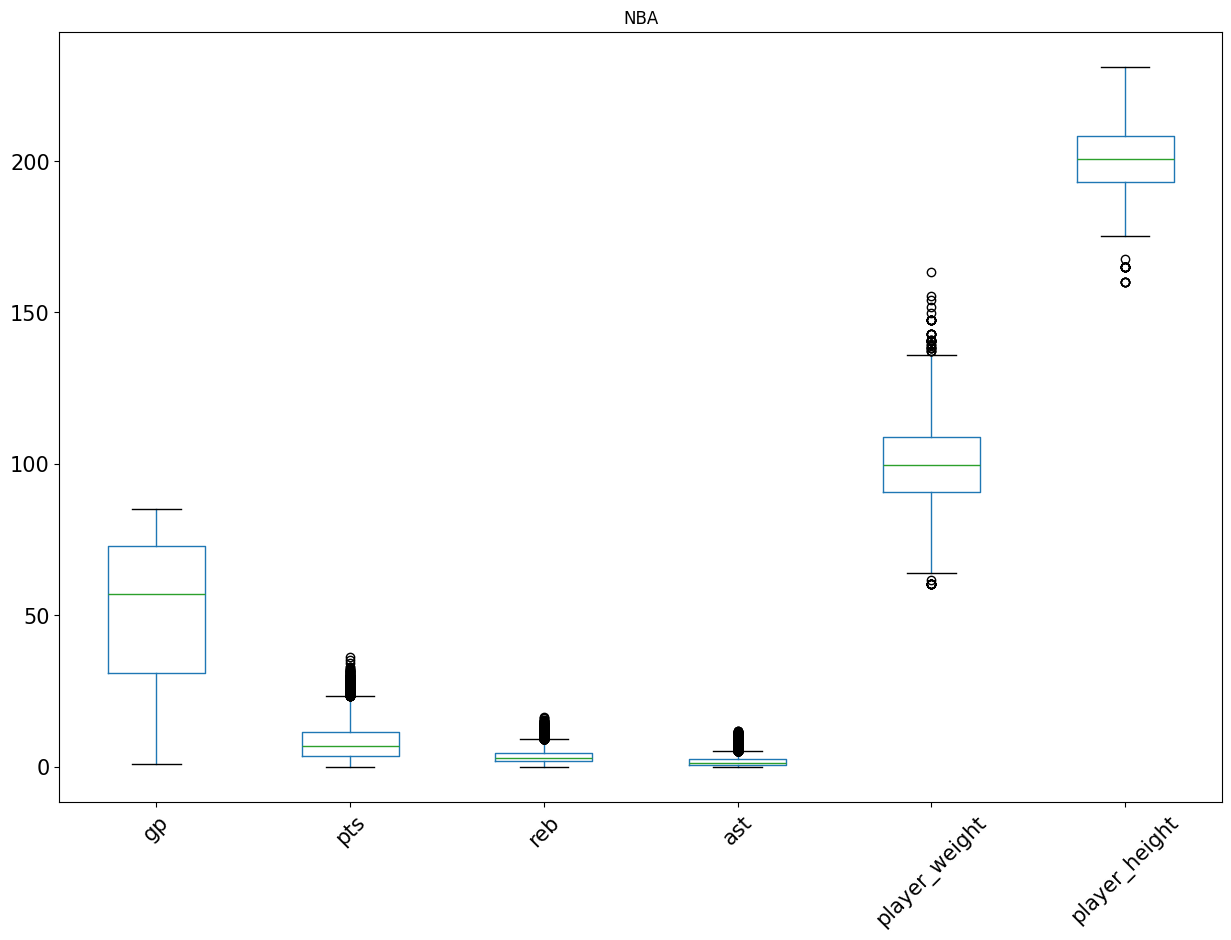

In [7]:
# Few data checks
plt.figure(figsize = (15, 10))
plt.title("NBA")
subset.boxplot(grid=False, rot=45, fontsize=15)
plt.show()

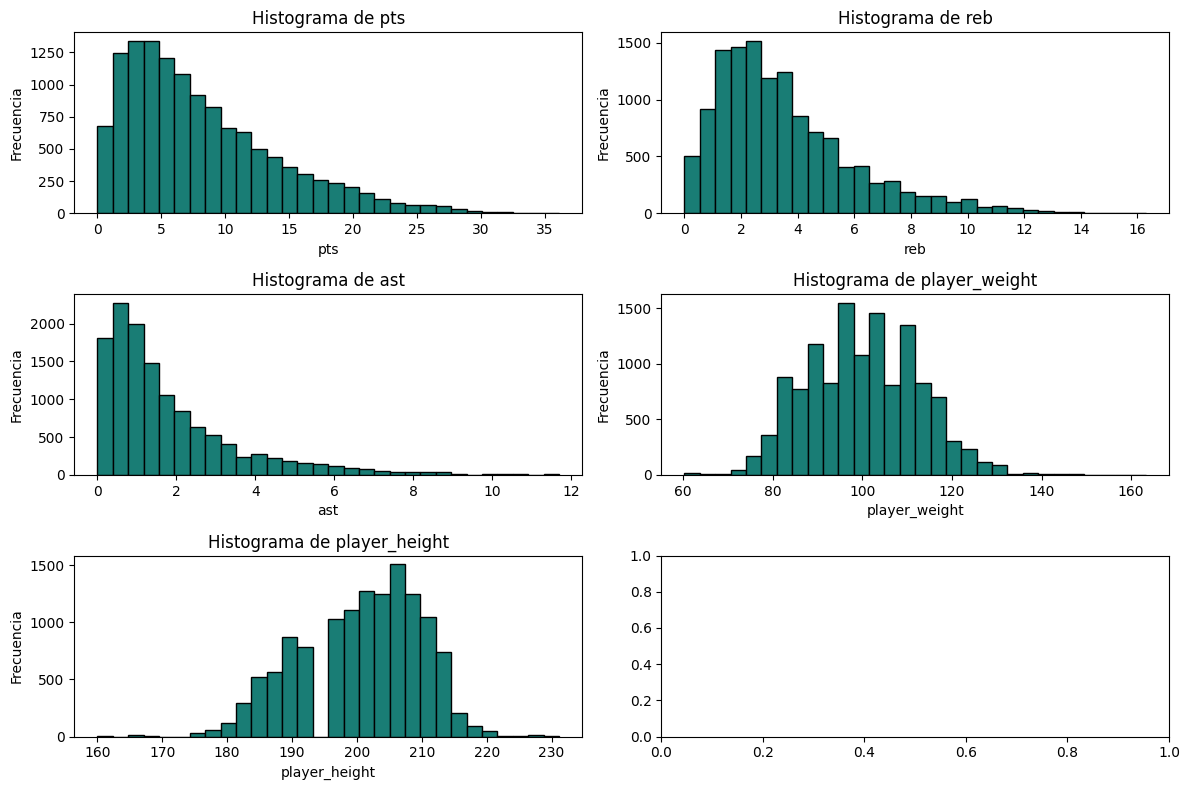

In [8]:
# Filtrar solo las columnas de tipo float
columnas_float = subset.select_dtypes(include=['float64'])

# Definir la disposición de la cuadrícula
num_filas = (len(columnas_float.columns) + 1) // 2
num_columnas = 2

# Crear la cuadrícula de subgráficos
fig, axs = plt.subplots(num_filas, num_columnas, figsize=(12, 8))
fig.subplots_adjust(hspace=0.5)  # Ajustar espacios verticales

# Crear histogramas para cada columna float
for i, columna in enumerate(columnas_float.columns):
    fila = i // num_columnas
    columna_actual = i % num_columnas

    axs[fila, columna_actual].hist(subset[columna], bins=30, edgecolor='black', color='#197D75')
    axs[fila, columna_actual].set_title(f'Histograma de {columna}')
    axs[fila, columna_actual].set_xlabel(columna)
    axs[fila, columna_actual].set_ylabel('Frecuencia')

# Ajustar automáticamente la disposición para evitar superposiciones
plt.tight_layout()

# Mostrar los gráficos
plt.show()

#### <font color='#197D75'> 2.1.3.2 Variables categoricas </font>

####
En principio, queremos observar como han sido los rendimientos de nuestros jugadores por temporada. Para ello, debemos investigar si nuestra base de datos se encuentra observacionalmente balanceada en funcion a la cantidad de jugadores que han participado de cada temporada.

In [9]:
subset_playersxseasons = datos.loc[:, ['season', 'player_name']]
# Agrupar por 'season' y contar la cantidad de datos para cada temporada
datos_por_playersxseason = subset_playersxseasons.groupby('season', observed=False).count().reset_index()


# Renombrar la columna 'player_name' (o cualquier otra columna) para representar la cantidad de datos
datos_por_playersxseason.rename(columns={'player_name': 'cantidad_de_jugadores'}, inplace=True)

# Mostrar el DataFrame resultante
print(datos_por_playersxseason)


     season  cantidad_de_jugadores
0   1996-97                    441
1   1997-98                    439
2   1998-99                    439
3   1999-00                    438
4   2000-01                    441
5   2001-02                    440
6   2002-03                    428
7   2003-04                    442
8   2004-05                    464
9   2005-06                    458
10  2006-07                    458
11  2007-08                    451
12  2008-09                    445
13  2009-10                    442
14  2010-11                    452
15  2011-12                    478
16  2012-13                    469
17  2013-14                    482
18  2014-15                    492
19  2015-16                    476
20  2016-17                    486
21  2017-18                    540
22  2018-19                    530
23  2019-20                    529
24  2020-21                    540
25  2021-22                    605
26  2022-23                    539


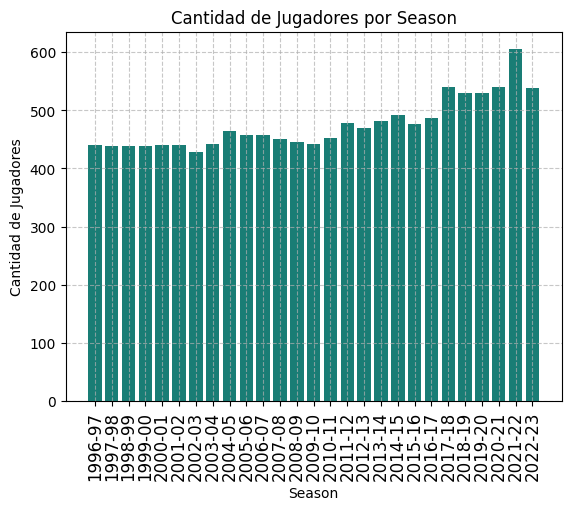

In [10]:
# Veamos que cantidad de jugadores tenemos en cada temporada
plt.bar(datos_por_playersxseason['season'], datos_por_playersxseason['cantidad_de_jugadores'], color='#197D75')
plt.xlabel('Season')
plt.ylabel('Cantidad de Jugadores')
plt.title('Cantidad de Jugadores por Season')
# Rotar las etiquetas del eje x verticalmente
plt.xticks(rotation='vertical', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

####
Vemos que nuestra base de datos se encuentra bastante balanceada. Sin embargo, notamos una ruptura en las observaciones que contamos a partir de la temporada 2017-18, y sobre todo un gran cambio que sucedio en la temporada 2021-22. La variacion puede deberse a multiplicidad de factores, pero estimo que la inclusion de los contratos de dos vias en 2017-18 puede haber sido el causante de este cambio. A partir de esa temporada se permitio que los equipos de la NBA generen contratos que permitian tener jugadores en su plantilla que se encuentren jugando en la National Basketball Association Development League. Esto debe haber permitido mayor rotacion de jugadores. Por otro lado, vemos que en 2021-22 hubo un salto grande en cantidad de jugadores. Esto puede deberse a las modificaciones de la normativa luego del COVID, donde se les permitio a los equipos poder contar con mas jugadores en su plantilla con el objetivo de tener mayor capacidad de inclusion de jugadores en caso de que haya un contagio masivo en los equipos. 

#### <font color='#197D75'> 2.1.3.3 Variables continuas y categoricas </font>

####
Para terminar de hacer un analisis general de mi base de datos, debemos entender bien el dominio. Es por ello, que debemos observar como se comportan nuestras variables continuas en funcion de nuestras variables categoricas.

C:\Users\Mateo\AppData\Local\Temp\ipykernel_32312\703375017.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = datos.groupby('season')[columnas_a_promediar].mean().reset_index()


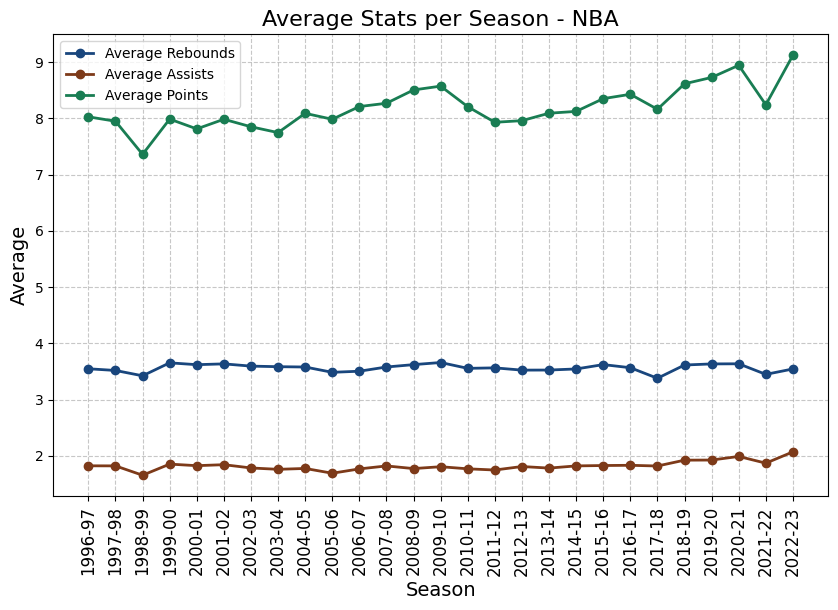

In [11]:
# Supongamos que ya tienes un DataFrame 'datos' y quieres calcular la media de varias columnas por temporada
datos['season'] = pd.Categorical(datos['season'])

# Lista de columnas para las cuales se calculará la media
columnas_a_promediar = ['pts', 'reb', 'ast', 'net_rating', 'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct', 'gp']

# Agrupar por temporada y calcular la media para las columnas especificadas
result = datos.groupby('season')[columnas_a_promediar].mean().reset_index()

# Crear un gráfico de línea con un estilo más profesional
plt.figure(figsize=(10, 6))

# Utilizar líneas más gruesas, cambiar los colores y el estilo
plt.plot(result['season'], result['reb'], marker='o', linestyle='-', color='#19467D', linewidth=2, label='Average Rebounds')
plt.plot(result['season'], result['ast'], marker='o', linestyle='-', color='#7D3A19', linewidth=2, label='Average Assists')
plt.plot(result['season'], result['pts'], marker='o', linestyle='-', color='#197D53', linewidth=2, label='Average Points')

# Agregar etiquetas y título al gráfico
plt.xlabel('Season', fontsize=14)
plt.ylabel('Average', fontsize=14)
plt.title('Average Stats per Season - NBA', fontsize=16)

# Rotar las etiquetas del eje x verticalmente
plt.xticks(rotation='vertical', fontsize=12)

# Añadir una cuadrícula para mejorar la legibilidad
plt.grid(True, linestyle='--', alpha=0.7)

# Agregar leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

####
Aqui podemos observar claramente que la evolucion en la cantidad de puntos por jugador viene con una tendencia creciente al correr de las temporadas, algo que no sucede, o al menos no de una manera tan marcada, en los rebotes y asistencias.

### <font color='#197D75'> 2.1.4 Conclusion </font>

Como nuestro objetivo final es poder definir jugadores en base a su capacidad de marcar o generar ocaciones de marca, debemos repensar nuestro scope en la base de datos. 

En primera media, dado que el basquet ha evolucionado en los ultimos años, no es lógico mantener en mi base de datos estadisticas de jugadores que han participado, por ejemplo, en la temporada 1996-1997, ya que podrian no ser representativos a los jugadores de hoy en dia. Podemos observar claramente que la evolucion en la cantidad de puntos por jugador viene con una tendencia creciente al correr de las temporadas, algo que no sucede, o al menos no de una manera tan marcada, en los rebotes y asistencias. En principio voy a evaluar las ultimas 10 temporadas, pero previo voy a analizar mejor la diferencia de medias que existe entre los sub-grupos 2013-14:2017-18 y 2018-19:2022-23, para ver si es necesario focalizar mas mis datos. 

En segundo lugar, tampoco es lógico tener una base de datos que contemple las medias de los puntos de los jugadores cuando estos han jugado solamente 1 juego en 1 temporada en los últimos 10 años, con lo cual, voy a volver a observar la distribucion de la variable 'pts', 'reb' y 'ast' y quedarme unicamente con los jugadores que se encuentren por encima del primer cuartil. Esta es una decision arbitraria, cuya justificacion es limpiar la base de aquellos jugadores que hayan jugado muy pocos minutos en la NBA para que no tiren nuestros promedios generales hacia abajo. Debemos evaluar los juadores que hayan formado parte de la NBA de manera constante. 

Estas decisiones me permitirá homogeineizar mi muestra para poder observar de manera mas critica cuales son las diferencias entre los jugadores, tratando de asegurar grupos lo mas homogeneos posibles dentro y lo mas heterogeneos posibles entre ellos. 

En tercer lugar, voy a estandarizar los datos de rendimiento de cada jugador para no sobrevalorar alguna metrica contemplada, como por ejemplo, los puntos que suman de a 1,2 o 3, con lo cual marcar al aro no va a sumar lo mismo que tomar un rebote o marcar una asistencia, esto podria estar asignandole una mayor relevancia a los puntos cuando en verdad queremos agrupar en base a estas tres medidas. 

Una vez hecho todo este procedimiento, pasaremos a realizar los tres metodos de clustering: por jerarquia, por K-means y por DBSCAN.

##### <font color='#197D75'> Seasons: </font>
Viendo el grafico de media de puntos por temporada, y respondiendo a la necesidad de quedarme con un subset mas actual, voy a analizar mejor la diferencia de medias que existe entre los sub-grupos 2013-14:2017-18 y 2018-19:2022-23.

In [12]:
subset = datos.loc[:, ['pts', 'reb', 'ast', 'gp', 'season', 'player_name']]

In [13]:
# Trabajamos nuestra variable categorica 'season' para poder realizar los filtros correspondientes 
subset['temporada'] = subset['season'].str[:4].astype(int) - 1996

# Filtrar las temporadas mayores o iguales a 2016
subset_season_10 = subset[subset['temporada'] >= 16]

subset_season_10.head()

,pts,reb,ast,gp,season,player_name,temporada
7156,3.3,5.1,0.4,12,2012-13,Earl Barron,16
7157,7.1,1.5,2.2,53,2012-13,Aaron Brooks,16
7158,11.7,9.4,1.3,82,2012-13,Tristan Thompson,16
7159,5.3,5.0,0.8,48,2012-13,Trevor Booker,16
7160,9.5,4.8,2.0,56,2012-13,Trevor Ariza,16


C:\Users\Mateo\AppData\Local\Temp\ipykernel_32312\3294489886.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_season_10.loc[:, 'grupo'] = ['I' if temporada < 22 else 'II' for temporada in subset_season_10['temporada']]


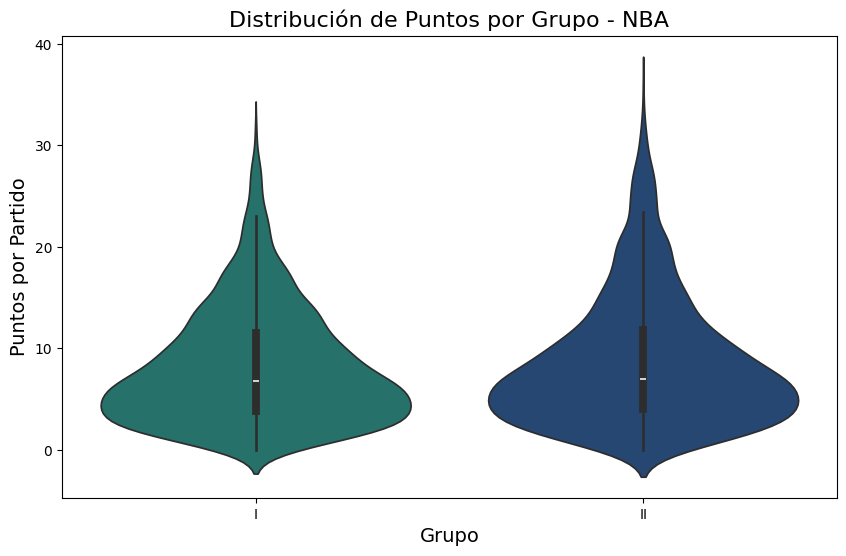

In [14]:
# Crear una nueva columna 'grupo' en base a la condición
subset_season_10.loc[:, 'grupo'] = ['I' if temporada < 22 else 'II' for temporada in subset_season_10['temporada']]
color_palette = {'I': '#197D75', 'II': '#19467D'}

# Violinplot con boxplot en el centro
plt.figure(figsize=(10, 6))
sns.violinplot(x='grupo', y='pts', data=subset_season_10, hue='grupo', inner='box', width=0.8, palette=color_palette, legend=False)

# Agregar etiquetas y título al gráfico
plt.xlabel('Grupo', fontsize=14)
plt.ylabel('Puntos por Partido', fontsize=14)
plt.title('Distribución de Puntos por Grupo - NBA', fontsize=16)

# Mostrar el gráfico
plt.show()

####
En principio no veo una diferencia muy marcada entre ambos grupos, el grupo B (temporadas mas actuales) registra jugadores con un promedio de puntos por temporada que excede la propia distribucion del grupo, lo que puede estar comprometiendo la media hacia arriba. Ahora, debemos mirar unicamente las estadisticas de los jugadores sin importar en que equipo juegan? Sospecho que no, el equipo suele influenciar en el rendimiento del jugador, dado que, si tiene un buen funcionamiento es mas probable que, en promedio, tenga mas aciertos. 

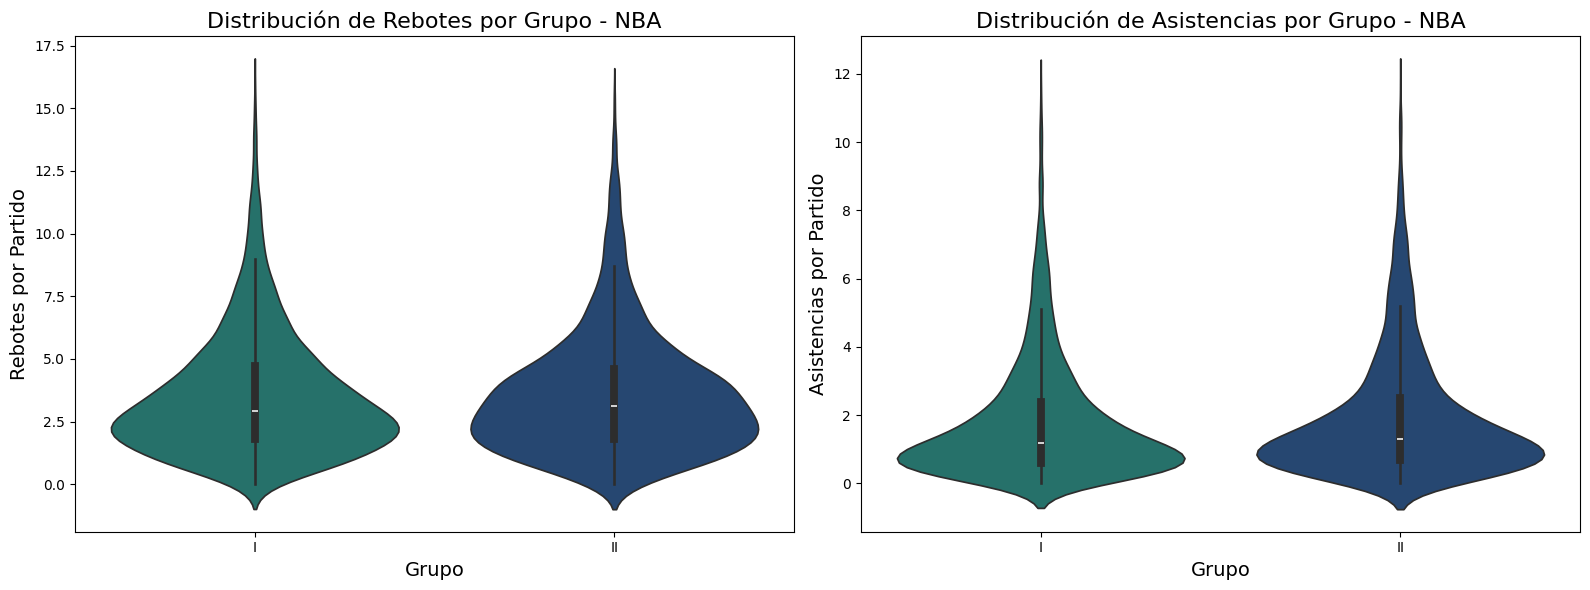

In [15]:
# Crear subplots con 1 fila y 2 columnas
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Primer gráfico: Distribución de Rebotes por Grupo
sns.violinplot(ax=axes[0], x='grupo', y='reb', data=subset_season_10, hue='grupo', inner='box', width=0.8, palette=color_palette, legend=False)
axes[0].set_xlabel('Grupo', fontsize=14)
axes[0].set_ylabel('Rebotes por Partido', fontsize=14)
axes[0].set_title('Distribución de Rebotes por Grupo - NBA', fontsize=16)

# Segundo gráfico: Distribución de Asistencias por Grupo
sns.violinplot(ax=axes[1], x='grupo', y='ast', data=subset_season_10, hue='grupo', inner='box', width=0.8, palette=color_palette, legend=False)
axes[1].set_xlabel('Grupo', fontsize=14)
axes[1].set_ylabel('Asistencias por Partido', fontsize=14)
axes[1].set_title('Distribución de Asistencias por Grupo - NBA', fontsize=16)

# Ajustar el diseño y mostrar los gráficos
plt.tight_layout()
plt.show()

####
Tal como lo comentamos anteriormente, en rebotes y en asistencia no hay una diferencia en las distribuciones.  

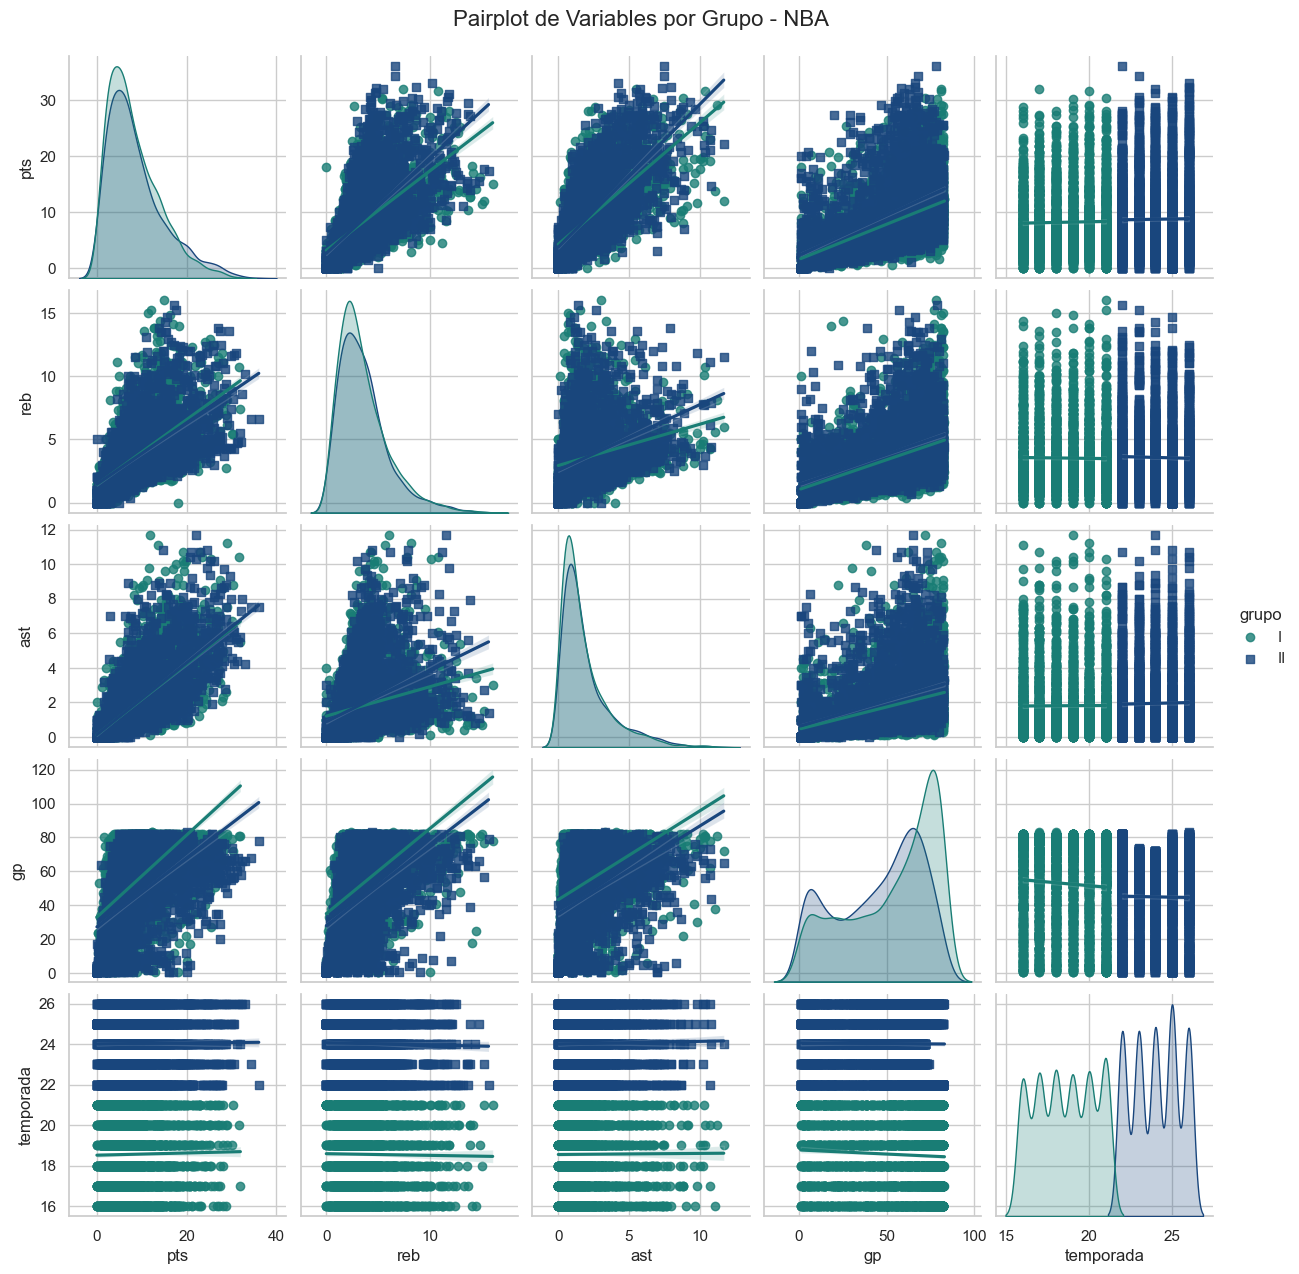

In [16]:
color_palette = {'I': '#197D75', 'II': '#19467D'}

# Crear el pairplot con líneas de regresión
sns.set(style="whitegrid")
pairplot = sns.pairplot(subset_season_10, hue='grupo', palette=color_palette, markers=['o', 's'], height=2.5, kind='reg')

# Ajustar el título del pairplot
pairplot.fig.suptitle('Pairplot de Variables por Grupo - NBA', y=1.02, fontsize=16)

# Mostrar el pairplot
plt.show()

##### <font color='#197D75'> Jugadores establecidos en la NBA: </font>
Viendo el grafico de media de puntos por temporada, y respondiendo a la necesidad de quedarme con un subset mas limpio, voy a analizar mejor la cantidad de partidos por jugador. Si bien seria ideal poder contar con el promedio de puntos, asistencias y rebotes por minutos jugados, la unica manera que encontramos para limpiar nuestra base es esta.

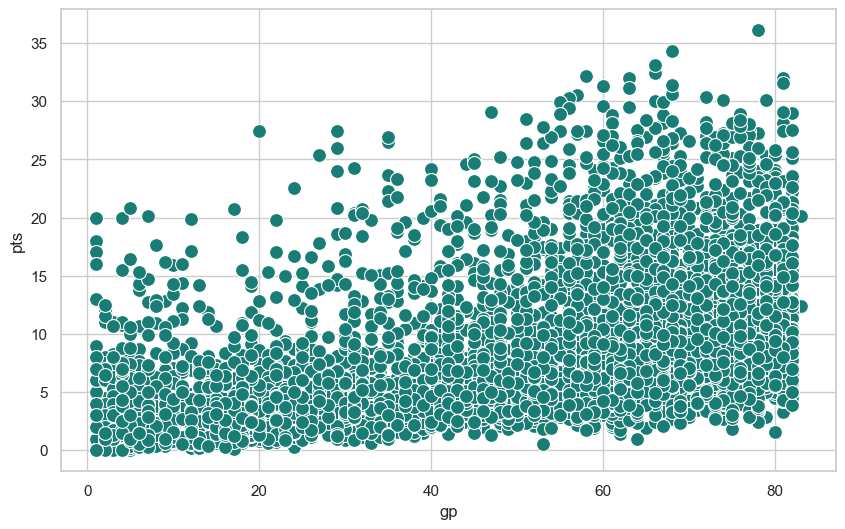

In [17]:
plt.figure(figsize = (10, 6))
sns.scatterplot(data = subset_season_10, x = "gp", y = "pts", s = 100, color='#197D75')
plt.show()

####
Graficamente vemos mayor amplitud de datos para aquellos jugadores que han jugado, en promedio, mas partidos en la NBA. Con lo cual esto va en linea a nuestro supuesto de que los jugadores de poca participacion pueden estar distorcionando nuestras metricas por no ser representativos, y por ende impactando sobre nuestro objetivo final.

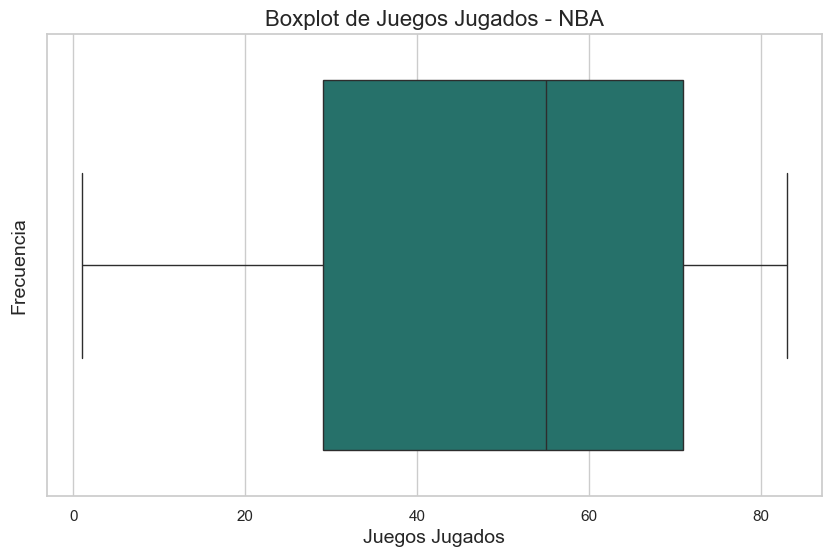

In [18]:
# Crear un boxplot de la variable 'gp'
plt.figure(figsize=(10, 6))
sns.boxplot(x='gp', data=subset_season_10, color='#197D75')

# Agregar etiquetas y título al gráfico
plt.xlabel('Juegos Jugados', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.title('Boxplot de Juegos Jugados - NBA', fontsize=16)

# Mostrar el gráfico
plt.show()



In [19]:
subset_season_10['gp'].describe()

count    5688.000000
mean       49.078762
std        25.092860
min         1.000000
25%        29.000000
50%        55.000000
75%        71.000000
max        83.000000
Name: gp, dtype: float64

####
En base a lo explicado anteriormente, me voy a quedar unicamente con los jugadores que hayan jugado mas de 29 partidos

In [20]:
subset_gp_29 = subset[subset['gp'] >= 29]
subset_gp_29.describe()

,pts,reb,ast,gp,temporada
count,9905.000000,9905.000000,9905.000000,9905.000000,9905.000000
mean,9.617294,4.071832,2.128460,62.433619,13.450681
std,5.908916,2.454914,1.870969,15.476187,7.774060
min,0.500000,0.300000,0.000000,29.000000,0.000000
25%,5.000000,2.300000,0.800000,50.000000,7.000000
50%,8.200000,3.500000,1.500000,65.000000,14.000000
75%,12.900000,5.200000,2.800000,76.000000,20.000000
max,36.100000,16.100000,11.700000,85.000000,26.000000


##### <font color='#197D75'> Conclusion final: </font>
En funcion de responder a nuestro interes de focalizar la informacion, y viendo que no hay diferencias entre ambos grupos, decido quedarme con las ultimas 10 temporadas. 
Por otro lado, tenemos un problema en nuestra base de datos. Nuestro objetivo es determinar las clases de jugadores que existen respecto a su capacidad de anotacion (o generar situacion de anotacion), pero contamos con los datos en promedio a los partidos jugados en la temporada ¿que sucede con esto? Aquellos jugadores que hayan participado pocos minutos en un partido, estan tirando debajo el promedio general. Como dijimos, seria interesante plantear esta situacion en promedio a los minutos jugados y no a los partidos jugados, ya que de esta manera ajustariamos mucho mejor el rendimiento de cada jugador. Sin embargo, no contamos con esa información. Es por ello, que me voy a quedar con aquellos jugadores que hayan jugado al menos 29 partidos por temporada (>1er cuartil), de esta manera intentamos limpiar aquellos que han jugado muy poco en cada temporada y puedan estar impactando negativamente en el resto. Contamos con 9.905 observaciones para poder proceder a realizar los clusters en funcion a las capacidades de cada jugador en marcar o generar situaciones de marca de puntos.

In [21]:
subset_final = subset_gp_29[['pts', 'reb', 'ast']]
subset_final.describe()

,pts,reb,ast
count,9905.000000,9905.000000,9905.000000
mean,9.617294,4.071832,2.128460
std,5.908916,2.454914,1.870969
min,0.500000,0.300000,0.000000
25%,5.000000,2.300000,0.800000
50%,8.200000,3.500000,1.500000
75%,12.900000,5.200000,2.800000
max,36.100000,16.100000,11.700000


### <font color='#197D75'> 2.2 Clustering </font>

In [22]:
columnas_a_normalizar = ['pts', 'reb', 'ast']

In [23]:
# Separar las variables de entrada
X = subset_final[columnas_a_normalizar]

# Inicializar el objeto StandardScaler
scaler = StandardScaler()

# Aplicar la estandarización
X_scaled = scaler.fit_transform(X)

# Crear un nuevo DataFrame con las variables normalizadas
subset_final_normalizado = pd.DataFrame(X_scaled, columns=columnas_a_normalizar)

# Agregar la columna 'player_name' al DataFrame normalizado
#season_5_normalized['player_name'] = season_5['player_name']

# Verificar el DataFrame normalizado
print(subset_final_normalizado)

           pts       reb       ast
0    -0.967620 -1.047679  0.145140
1    -0.222945  0.948418 -0.122114
2     0.098620 -0.518102 -0.229016
3    -1.153788 -0.966206 -0.977329
4     0.166317 -0.762522  0.038239
...        ...       ...       ...
9900 -0.459887 -0.518102  0.626199
9901  3.974315  2.496412  1.107257
9902  0.589428  0.989155 -0.496271
9903 -1.052242  0.255895 -0.870427
9904 -0.544509 -0.192209 -0.656624

[9905 rows x 3 columns]


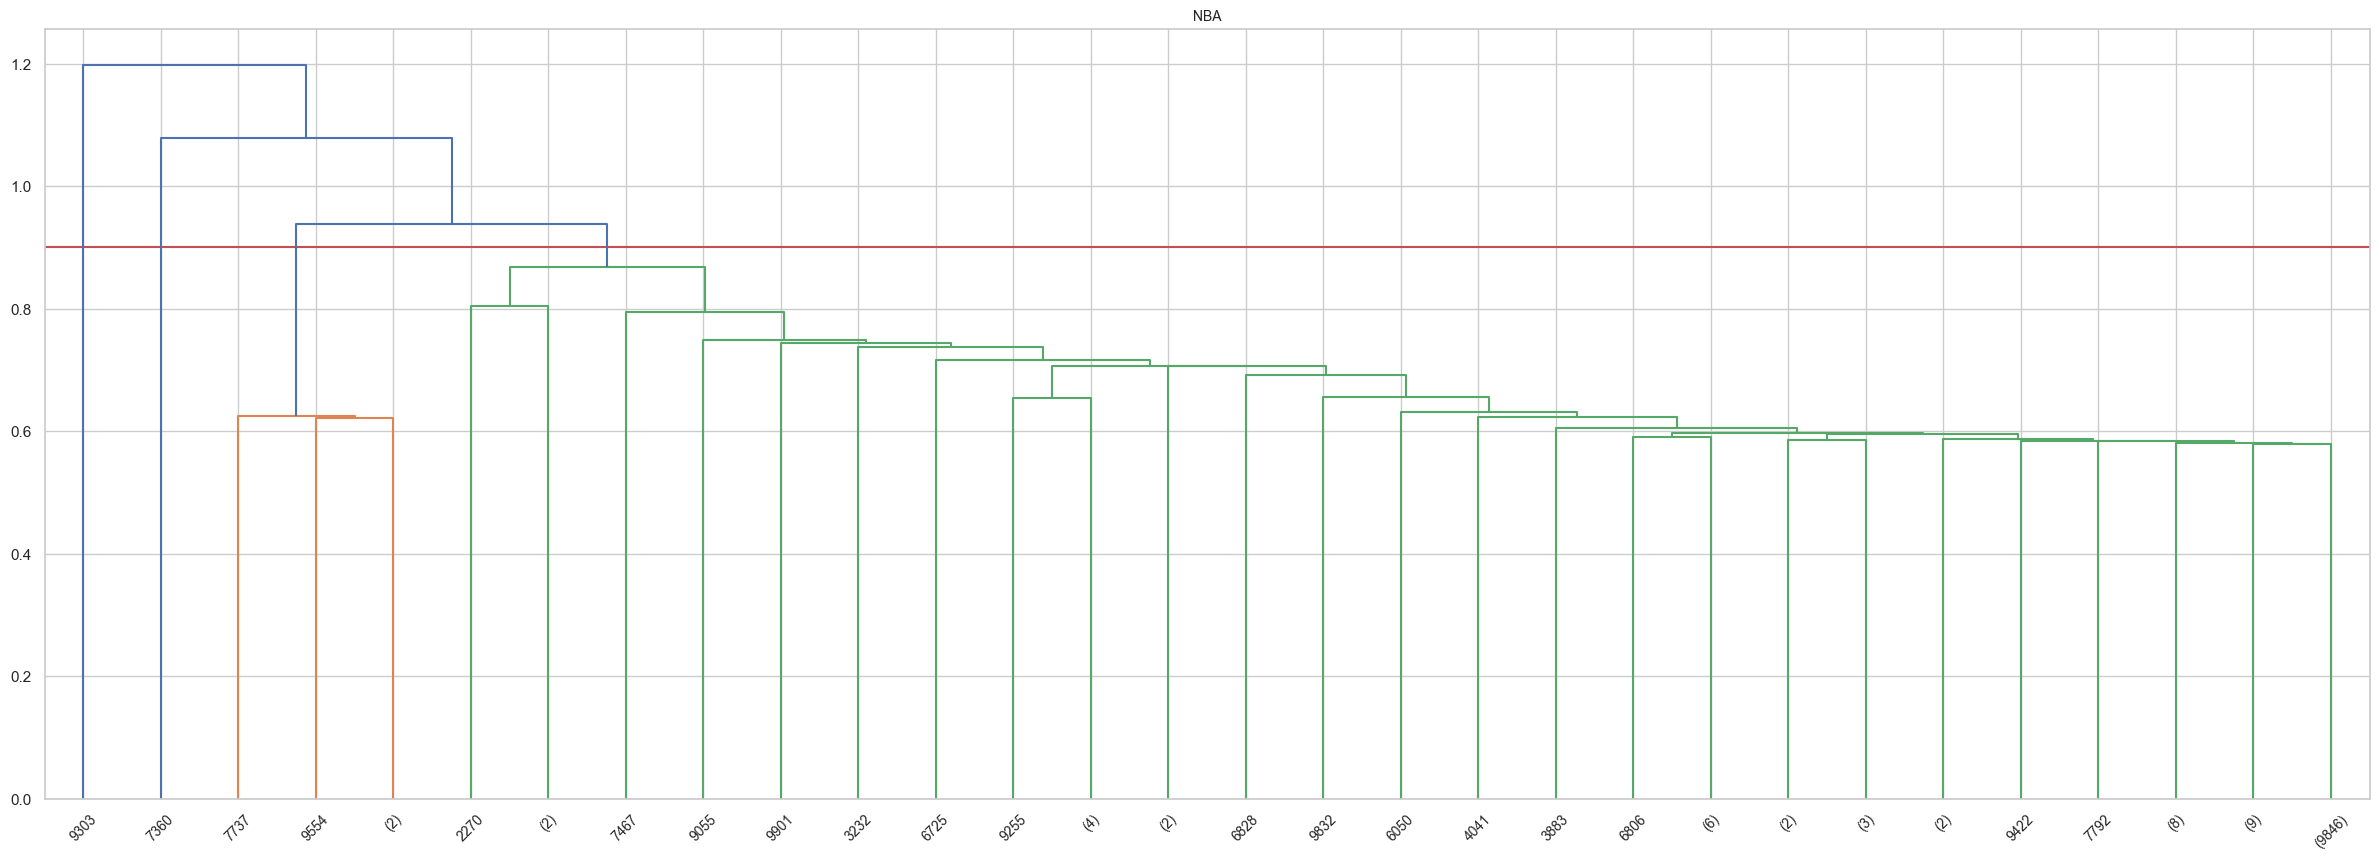

In [24]:
Z = hierarchy.linkage(subset_final_normalizado)

plt.figure(figsize = (30, 10))
# Color threshold is basically where do we apply the 'cut' (linkage metric). For us, is all those elements closer than the value
# count_sort just sorts from bigger to smaller

cLimit = 0.9
#dn = hierarchy.dendrogram(Z, color_threshold = cLimit, count_sort = "ascending") # ascending/descending are both acceptable
plt.hlines(cLimit, 0, 1600, color = 'r')

# Summarized dendogram (need to comment the previous dn!)
dn = hierarchy.dendrogram(Z, truncate_mode = 'lastp', color_threshold = cLimit, count_sort = "ascending")
plt.title("NBA", fontsize = 10)
plt.xticks(fontsize = 10)
plt.show()

####
El modelo jerarquico nos proporciona una representacion visual de como los elementos de nuestro conjunto de datos se agrupan entre si. Este tipo de modelo organiza los datos en una estructura jerarquica, donde los elementos se agrupan en clusteres en diferentes niveles. Podemos tener clusteres mas grandes que engloban a clústeres más pequeños, creando una estructura de "arbol" o jerarquia.

Sin embargo, el aspecto clave aqui es que, para utilizar estos clusteres de manera practica y asignar cada punto de datos a un cluster especifico, necesitamos establecer un limite de corte en la jerarquia. Este limite determina en que punto de la jerarquia dividimos nuestros datos en clusteres distintos.

La eleccion del limite de corte es una decision subjetiva y depende de los objetivos especificos del analisis. No hay una regla unica para establecer este corte, y diferentes limites pueden dar lugar a resultados distintos. Es por esta razon que marcado mi corte a la altura de 0.9, ya que la misma me permite visualizar 3 clusteres distintos, que es en principio lo que estoy buscando (alta participacion, media participacion, baja participacion).

Es importante entender que, aunque nos proporciona una representacion intuitiva de las relaciones entre los datos, la verdadera tarea de clusterizacion y asignacion de puntos a clusteres ocurre al establecer este limite, con lo cual, el modelo jerarquico es una herramienta exploratoria y visual que nos ayuda a entender la estructura de los datos, pero la interpretacion final y la clusterizacion efectiva se logran mediante decisiones subjetivas al establecer el limite de corte.

#### <font color='#197D75'> 2.2.2 K-means </font>

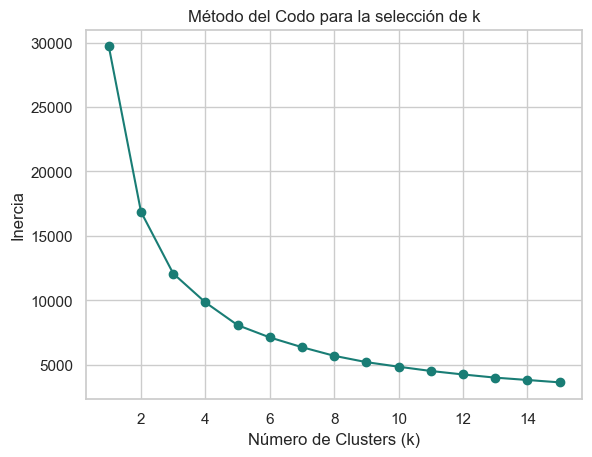

In [25]:
X_data = subset_final_normalizado[['pts', 'reb', 'ast']].values

# Generar 'k' modelos KMeans
k_values = range(1, 16)
inertias = []

for k in k_values:
    kmeans_model = KMeans(n_clusters=k, random_state=1, n_init=10)
    kmeans_model.fit(X_data)
    inertias.append(kmeans_model.inertia_)

# Graficar la inercia en funcion de k
plt.plot(k_values, inertias, 'o-', color='#197D75')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo para la selección de k')
plt.show()

##### <font color='#197D75'> Agregado: </font>

En clase me habia quedado con la duda de si no se podia establecer un termino matematico que nos identifique el punto donde cambio de la pendiente de la funcion de codo sea mas abrupto, para poder ver matematicamente para que k tenemos el codo mas grande, con lo cual (con la ayuda de ChatGPT), intente calcular la derivada segunda de la funcion del codo

In [26]:
# Función para calcular la derivada primera
def calcular_derivada_primera(k):
    kmeans_model = KMeans(n_clusters=k, random_state=1, n_init=10)
    kmeans_model.fit(X_data)
    return kmeans_model.inertia_

# Generar 'k' modelos KMeans
k_values = range(1, 16)
inertias = []

# Calcular la inercia
for k in k_values:
    kmeans_model = KMeans(n_clusters=k, random_state=1, n_init=10)
    kmeans_model.fit(X_data)
    inertias.append(kmeans_model.inertia_)

# Calcular la derivada primera
derivada_primera = [((inertias[i] - inertias[i-1]) / (k_values[i] - k_values[i-1])) if i > 0 else 0 for i in range(len(inertias))]

# Calcular la variación (delta) para la derivada primera
delta = pd.Series(derivada_primera).diff()

# Crear un DataFrame con los valores de k, la inercia, la derivada primera y la variación (delta)
df_resultados = pd.DataFrame({
    'k_values': list(k_values),
    'inercia': inertias,
    'derivada_primera': derivada_primera,
    'delta': delta
})

# Mostrar el DataFrame
print(df_resultados)


    k_values       inercia  derivada_primera         delta
0          1  29715.000000          0.000000           NaN
1          2  16863.151909     -12851.848091 -12851.848091
2          3  12074.669708      -4788.482202   8063.365889
3          4   9830.355188      -2244.314519   2544.167682
4          5   8063.962112      -1766.393076    477.921443
5          6   7109.314241       -954.647872    811.745204
6          7   6351.596989       -757.717252    196.930620
7          8   5682.101164       -669.495825     88.221427
8          9   5190.525144       -491.576020    177.919804
9         10   4835.876106       -354.649038    136.926982
10        11   4504.916992       -330.959115     23.689923
11        12   4233.693963       -271.223028     59.736086
12        13   3988.292696       -245.401267     25.821761
13        14   3805.544506       -182.748190     62.653077
14        15   3620.693716       -184.850790     -2.102600


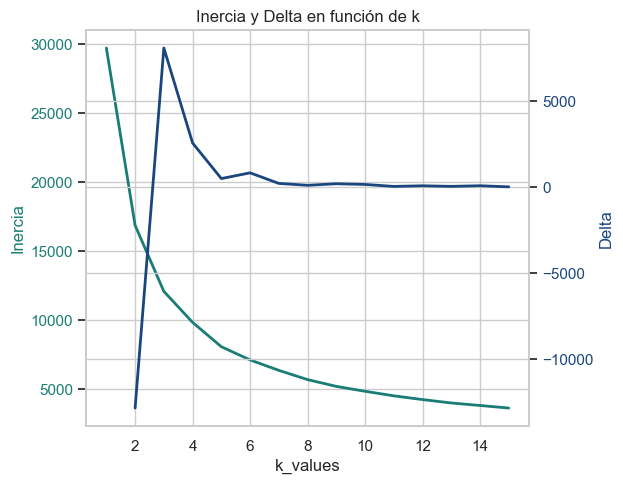

In [27]:
# Crear una figura y ejes
fig, ax1 = plt.subplots()

# Graficar la inercia en el eje izquierdo
color_inercia = '#197D75'  # Color para inercia
ax1.set_xlabel('k_values')
ax1.set_ylabel('Inercia', color=color_inercia)
ax1.plot(df_resultados['k_values'], df_resultados['inercia'], color=color_inercia, label='Inercia', linewidth=2)
ax1.tick_params(axis='y', labelcolor=color_inercia)

# Crear un segundo eje para delta en el eje derecho
ax2 = ax1.twinx()
color_delta = '#19467D'  # Color para delta
ax2.set_ylabel('Delta', color=color_delta)
ax2.plot(df_resultados['k_values'], df_resultados['delta'], color=color_delta, label='Delta', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color_delta)

# Mostrar la gráfica
fig.tight_layout()
plt.title('Inercia y Delta en función de k')
plt.show()

####
A traves de la comprobacion matematica podemos ver que el mayor salto en las pendientes se da para k=3. Con lo cual, este seria por el metodo del codo el numero de clusters optimos. Sin embargo, a ojo hubiera dicho que hay que agregar 5 clusters. Veamos como dan los resultados para cada uno:

In [28]:
# Número óptimo de clusters determinado por el método del codo
optimal_k0 = 3
optimal_k1 = 5

##### <font color='#197D75'> Definimos 3 clusters: </font>

In [29]:
# Crear el modelo KMeans con el número óptimo de clusters
kmeans_model0 = KMeans(n_clusters=optimal_k0, random_state=0, n_init=10).fit(X_data)

# Obtener las etiquetas de los clusters para cada muestra en tu DataFrame
cluster_labels0 = kmeans_model0.predict(X_data)

# Agregar las etiquetas de los clusters a tu DataFrame original
subset_final_normalizado['cluster_label0'] = cluster_labels0

# Mostrar las primeras filas del DataFrame con las nuevas etiquetas
print(subset_final_normalizado.head())

        pts       reb       ast  cluster_label0
0 -0.967620 -1.047679  0.145140               1
1 -0.222945  0.948418 -0.122114               2
2  0.098620 -0.518102 -0.229016               1
3 -1.153788 -0.966206 -0.977329               1
4  0.166317 -0.762522  0.038239               1


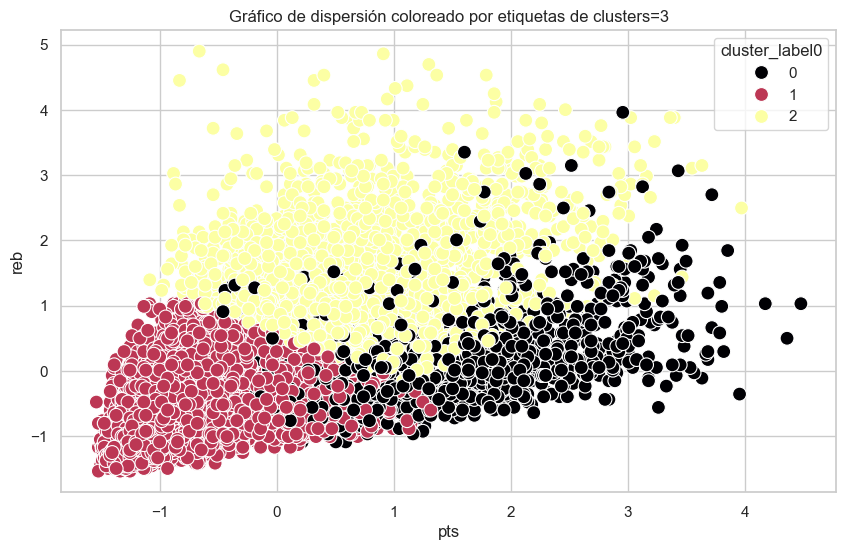

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=subset_final_normalizado, x="pts", y="reb", hue="cluster_label0", palette="inferno", s=100)
plt.title('Gráfico de dispersión coloreado por etiquetas de clusters=3')
plt.show()

##### <font color='#197D75'> Definimos 5 clusters: </font>

In [31]:
# Crear el modelo KMeans con el número óptimo de clusters
kmeans_model1 = KMeans(n_clusters=optimal_k1, random_state=0, n_init=10).fit(X_data)

# Obtener las etiquetas de los clusters para cada muestra en tu DataFrame
cluster_labels = kmeans_model1.predict(X_data)

# Agregar las etiquetas de los clusters a tu DataFrame original
subset_final_normalizado['cluster_label1'] = cluster_labels

# Mostrar las primeras filas del DataFrame con las nuevas etiquetas
print(subset_final_normalizado.head())

        pts       reb       ast  cluster_label0  cluster_label1
0 -0.967620 -1.047679  0.145140               1               3
1 -0.222945  0.948418 -0.122114               2               1
2  0.098620 -0.518102 -0.229016               1               0
3 -1.153788 -0.966206 -0.977329               1               3
4  0.166317 -0.762522  0.038239               1               0


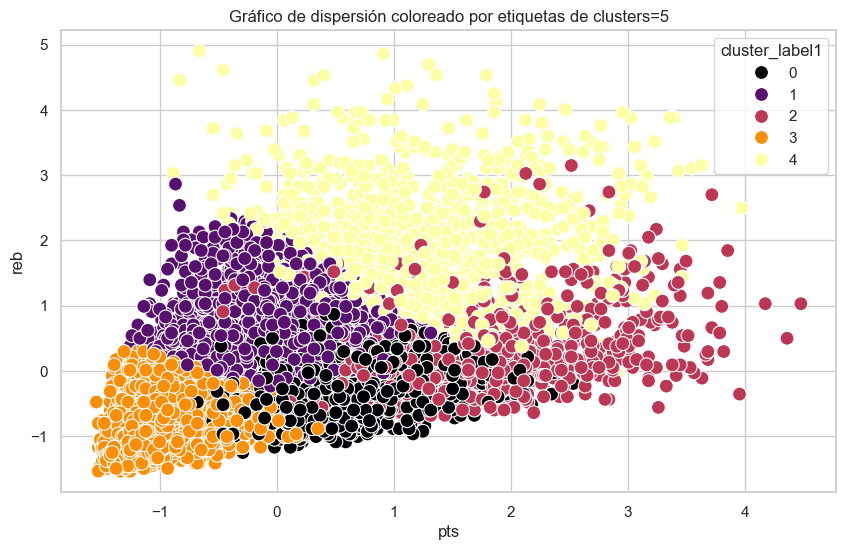

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=subset_final_normalizado, x="pts", y="reb", hue="cluster_label1", palette="inferno", s=100)
plt.title('Gráfico de dispersión coloreado por etiquetas de clusters=5')
plt.show()

#### <font color='#197D75'> 2.2.3 DBSCAN </font>

Estimated number of clusters: 8
Estimated number of noise points: 2425


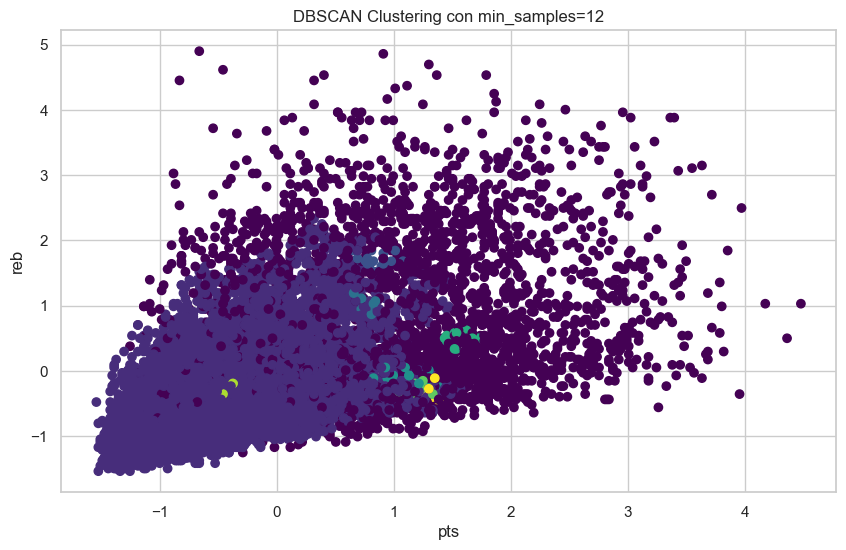

In [33]:
# Supongamos que 'subset4a' es tu DataFrame con las columnas 'pts', 'reb', y 'ast'
X_data = subset_final_normalizado[['pts', 'reb', 'ast']].values

# Escalar los datos para que tengan media cero y desviación estándar uno
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_data)

# Aplicar DBSCAN
db = DBSCAN(eps=0.2, min_samples=12).fit(X_scaled)
labels = db.labels_

# Análisis de Resultados de DBSCAN
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

# Crear DataFrame para Visualización
datasetDBSCAN = pd.DataFrame({"pts": X_data[:, 0],
                              "reb": X_data[:, 1],
                              "ast": X_data[:, 2],
                              "label": labels})

# Visualización de Resultados
plt.figure(figsize=(10, 6))
plt.scatter(datasetDBSCAN.pts, datasetDBSCAN.reb, c=datasetDBSCAN.label, cmap='viridis')
plt.title("DBSCAN Clustering con min_samples=12")
plt.xlabel('pts')
plt.ylabel('reb')
plt.show()


Estimated number of clusters: 5
Estimated number of noise points: 930


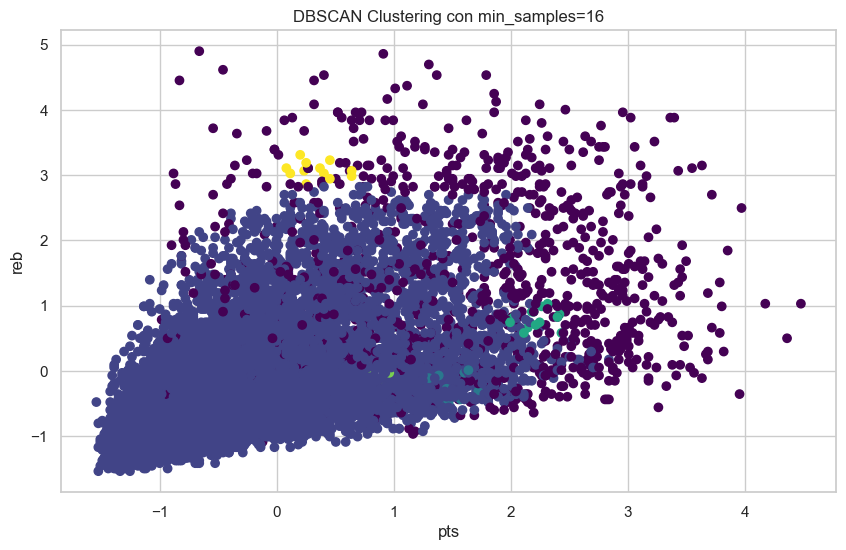

In [34]:
# Supongamos que 'subset4a' es tu DataFrame con las columnas 'pts', 'reb', y 'ast'
X_data = subset_final_normalizado[['pts', 'reb', 'ast']].values

# Escalar los datos para que tengan media cero y desviación estándar uno
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_data)

# Aplicar DBSCAN
db = DBSCAN(eps=0.3, min_samples=13).fit(X_scaled)
labels = db.labels_

# Análisis de Resultados de DBSCAN
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

# Crear DataFrame para Visualización
datasetDBSCAN = pd.DataFrame({"pts": X_data[:, 0],
                              "reb": X_data[:, 1],
                              "ast": X_data[:, 2],
                              "label": labels})

# Visualización de Resultados
plt.figure(figsize=(10, 6))
plt.scatter(datasetDBSCAN.pts, datasetDBSCAN.reb, c=datasetDBSCAN.label, cmap='viridis')
plt.title("DBSCAN Clustering con min_samples=16")
plt.xlabel('pts')
plt.ylabel('reb')
plt.show()


### <font color='#197D75'> 2.3 Conclusiones generales y posibles mejoras </font>

####

El objetivo principal de este trabajo era poder aplicar los algoritmos de clusterizacion para poder definir jugadores según su capacidad para anotar o generar oportunidades de anotación. Esto implico llevar a cabo un profundo analisis de nuestra base de datos, en conjunto con una intensa averiguacion respecto al dominio seleccionado. Para ello nos basamos en 5 variables del nuestra base de datos, las medias por temporada de: la cantidad de puntos, la cantidad de rebotes, la cantidad de asistencias, la cantidad de partidos jugados, y por ultimo, las temporadas. En primer lugar, identificamos que existe una tendencia creciente en la cantidad de puntos por jugador a lo largo de las temporadas, a diferencia de rebotes y asistencias, que no muestran un aumento tan marcado. Evidentemente la NBA evoluciono en el ultimo tiempo, viendo reflejado esto en el promedio de puntos por partido por temporada desde 1996-97. Dado esto, como nuestro objetivo es poder generar un algoritmo de etiquetado que permita identificar en distintos clusters jugadores en base a su potencial de marca (ya sea directamente con puntos, como tambien con rebotes y asistencias) hemos decidido achicar nuestra base de datos, entendiendo que poner el foco en temporadas mas actuales seria algo mas representativo en nuestra evaluacion final. De nada sirve entrenar nuestro modelo con datos de jugadores de 1996-97. En linea con esto, evidenciamos que tampoco era util tener jugadores que tenian poca cantidad de minutos, dado que podrian estar tirando para abajo los promedios de nuestras variables seleccionadas (puntos, rebotes y asistencia). 

Por por estos motivos que, luego de evaluar los datos, decidimos seleccionar las ultimas 10 temporadas de la NBA y solamente aquellos jugadores que hayan participado en al menos 29 partidos por temporada (ubicados por encima del primer cuartil). De esta manera, buscamos excluir a aquellos jugadores que han tenido una participación mínima en cada temporada y que podrían tener un impacto negativo en los resultados generales. Disponemos de un total de 9,905 observaciones, lo que nos permite avanzar con la creación de clusters según las habilidades de cada jugador para anotar o generar oportunidades de anotación.

Antes de pasar a calcular los clusters, normalizamos las variables seleccionadas. Esto lo decidimos ya que la variable puntos, no suma de la misma manera que puede llegar a sumar anotaciones o rebotes, esta a diferencia puede sumar de a dos o de a 3 de un tiro. A traves del metodo estandar logramos transformar todas nuestras variables para que entre ellas tengan una media de 0 y una varianza igual a 1. Esto logra tener una escala comun para nuestra base de datos, sin repercutir en la estimacion de los clusteres cuando tenemos variable de distinta escala. 

Finalmente, pasamos a calcular los clusteres mediante los 3 metodos. Respecto al metodo jerarquico, si bien algo ya comente en el proceso, mi conclusion final es una herramienta exploratoria y visual que nos ayuda a entender la estructura de los datos, pero la interpretacion final y la clusterizacion efectiva se logran mediante decisiones subjetivas al establecer el limite de corte. Esto no ocurre con los otros dos metodos (KMeans y DBSCAN), ya que cuentan con metricas de optimizacion de clusteres segun la dispercion de los datos. En el KMeans, tenemos el metodo del codo que nos ayuda a elegir el nivel optimo de clusteres para calcular bajo ese metodo. Como agregado, genere una variable delta que mide la diferencia entre pendientes por segmentos de los distintos modelos k. Este resultado me dio que lo optimo era escoger 3 clusteres para realizar el modelo. Sin embargo, si no hubiera hecho esto, hubiera elegido a ojo un k = 5 como el nivel optimo (de hecho antes de pensar la herramienta matematica solamente habia probado con k = 5). Luego representamos los dos casos para ver como se daba en cada uno. Claramente para k = 3 hay una separabilidad mas determinada (aunque con algunas observaciones mezcladas, pero esto se debe a que no debemos olvidar que la representacion es bidimensional, con lo cual estas observaciones pueden estar influenciadas por las otra variable de nuestro modelo). En mi opinion, este es el modelo que mayor claridad aporto a nuestro objetivo principal. En ultimo lugar, calculamos los clusters por el metodo de DBSCAN, este metodo se realiza a traves de densidades y es util para evaluar los outliers. Fijamos la densidad en 0.2 y la cantidad de conexiones en 12 (totalmente arbitrario). En su estimacion nos dio que era optimo realizar 8 clusteres distintos, pero la verdad que su resultado fue en su mayoria ruido (casi el 25% de los datos fueron ruido -> 2425/9905). Por ello retoque los parametros, fije la densidad en 0.3 y un minimo de conexiones de 13. Este resultado fue muy superior, nos dio 5 clusters y 930 variables de ruido (casi el 10%). Esto fue funcional a nuestro objetivo, ya que no se dispararon la cantidad optimas de clusters y han bajado mucho los outliers. Sin embargo, hay mucha superposicion de observaciones. Sinceramente el grafico de DBSCAN aporta muy poco.

El modelo podria mejorarse si hubiesemos contado con los datos de los minutos jugados en promedio por temporada para cada jugador, para poder medir los promedios de nuestras variables en base a los minutos de juego, ya que, por ejemplo, si jugo 1 minuto y no marco, no asistio, ni tomo ningun rebote (logico en tan poco tiempo), estaria sumando cero al denominador de nuestras variables y sumando 1 al denominador de nuestras variables, tirando para abajo los promedios generales cuando los observamos por temporada. Ademas, podriamos haber hecho una falsa matriz de confusion, viendo que label le pusimos a Lebron James, por ejemplo. Ademas, hubiera pensado alguna herramienta matematica que minimizando el ruido, me permitiese conocer los parametros de densidad y minimo de conexiones optimos para que me de entre 3 y 6 clusters.